# Eploratory Data Analysis (EDA)

## Tasks

* Print the class distribution, i.e., the proportion of images in each category.
* What is the accuracy of the "most-frequent" baseline?**
* Plot a few images from the data set, e.g., ten images from each category
* Create a scree plot of the OverFeat features.**
* What is the cumulated proportion of variance explained (PVE) in the first two components?
* How many components should we keep to retain 80%, 90%, 95% and 99% of the variance explained?

Finally, apply PCA to create 2d plots of the input data.

* Create a 2d plot of the OverFeat features.
* Create a 2d plot using the matrix of image pixels.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import tensorflow as tf

import random

import warnings
warnings.simplefilter("ignore")

# Activate Seaborn style
sns.set()

C:\Users\fbaff\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\fbaff\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\fbaff\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\fbaff\AppData\Roaming\Python\Python36\site-

## Import data

In [2]:
# Load the npz file
with np.load('C:/Users/fbaff/EPFL ML Python/4- Machine Learning 2/ML 2 Project/Cifar4-train.npz', allow_pickle=False) as cifar_df:
    # It's a dictionary-like object
    cifar4 = dict(cifar_df.items())

In [3]:
list(cifar4.keys())

['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']

### Create X/y arrays

In [4]:
X=cifar4['pixels']
y=cifar4['labels']
names=cifar4['names']

print(X.shape, X.dtype)
print(y.shape, y.dtype)
print(names.shape, names.dtype)

(5000, 3072) uint8
(5000,) int64
(4,) <U8


In [5]:
# Print labels
labels = np.unique(y)
print('Labels:', labels)

Labels: [0 1 2 3]


In [6]:
# Print names
n = np.unique(names)
print('Names:', n)

Names: ['airplane' 'car' 'ship' 'truck']


## Print class distribution

In [7]:
# Image distribution
pd.value_counts(y, normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
dtype: float64

## Create Train and Test data sets

In [8]:
# Convert the type of the input matrix to float
X = X.astype(np.float)

# Split data into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, train_size=4000, test_size=1000, random_state=0)

In [9]:
# Image distribution y_tr
pd.value_counts(y_tr, normalize=True)

1    0.25575
2    0.25075
3    0.24800
0    0.24550
dtype: float64

In [10]:
# Image distribution y_te
pd.value_counts(y_te, normalize=True)

0    0.268
3    0.258
2    0.247
1    0.227
dtype: float64

## The Most Frequent Baseline

In [11]:
# Create the dummy classifier
baseline = DummyClassifier(strategy='most_frequent')

In [12]:
# Fit it
baseline.fit(X_tr, y_tr)

# Compute test accuracy
accuracy = baseline.score(X_te, y_te)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.23


## Print 10 images from each category

Label: 0 (truck)


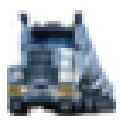

Label: 0 (truck)


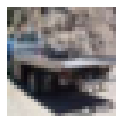

Label: 0 (truck)


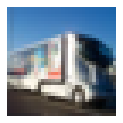

Label: 0 (truck)


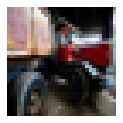

Label: 0 (truck)


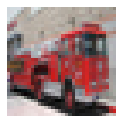

Label: 0 (truck)


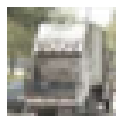

Label: 0 (truck)


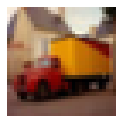

Label: 0 (truck)


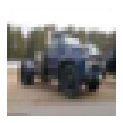

Label: 0 (truck)


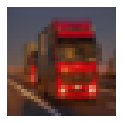

Label: 0 (truck)


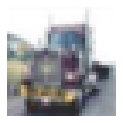

Label: 1 (car)


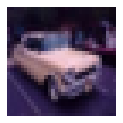

Label: 1 (car)


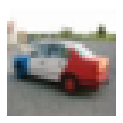

Label: 1 (car)


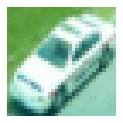

Label: 1 (car)


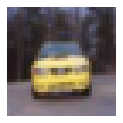

Label: 1 (car)


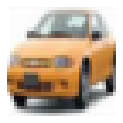

Label: 1 (car)


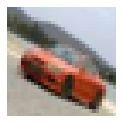

Label: 1 (car)


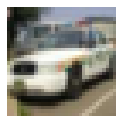

Label: 1 (car)


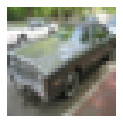

Label: 1 (car)


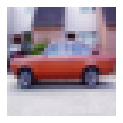

Label: 1 (car)


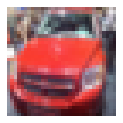

Label: 2 (airplane)


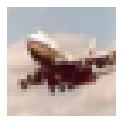

Label: 2 (airplane)


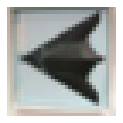

Label: 2 (airplane)


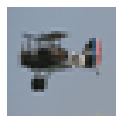

Label: 2 (airplane)


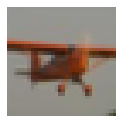

Label: 2 (airplane)


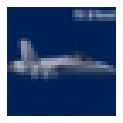

Label: 2 (airplane)


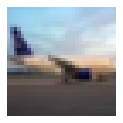

Label: 2 (airplane)


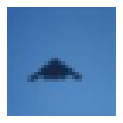

Label: 2 (airplane)


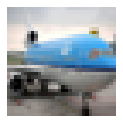

Label: 2 (airplane)


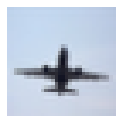

Label: 2 (airplane)


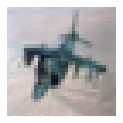

Label: 3 (ship)


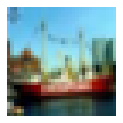

Label: 3 (ship)


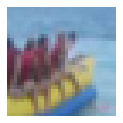

Label: 3 (ship)


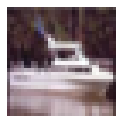

Label: 3 (ship)


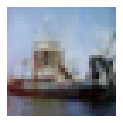

Label: 3 (ship)


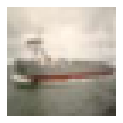

Label: 3 (ship)


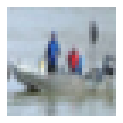

Label: 3 (ship)


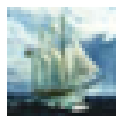

Label: 3 (ship)


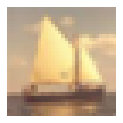

Label: 3 (ship)


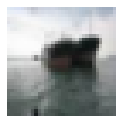

Label: 3 (ship)


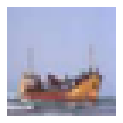

In [13]:
# Function to plot the i-th image from some X/y arrays
def show_image(idx, X, y, c):
    # Print its label
    label = y[y==c][idx]
    print('Label: {} ({})'.format(
        label,
        names[label] # Class name
    ))

    # Get image pixels
    flat_img = X[y==c][idx] # has shape (3072,)
    
    # Reshape the "flat vector" into a 32x32x3 array 
    img = flat_img.reshape(32, 32, 3)
    
    # The imshow() function expects pixel values
    # between 0 and 1 when the data type is float.
    img = img/255 # Rescale [0,255] values to [0,1]
    
    fig=plt.figure(figsize=(2,2)) # 2 by 2 figure (in inches)
    plt.imshow(img)
    plt.axis('off') # Hide the x- and y-axis
    plt.show()
      
    
# Show 10 images from the training set
for c in [0,1,2,3]:
    for i in range(10):
        show_image(i,X_tr,y_tr,c)
        

## Principal Component Analysis

### Create Xo array for Overfeat and Xp for Pixels

In [14]:
Xo=cifar4['overfeat'] # overfeat
Xp=cifar4['pixels'] # pixels
y=cifar4['labels']
names=cifar4['names']

print(Xo.shape, Xo.dtype)
print(Xp.shape, Xp.dtype)
print(y.shape, y.dtype)
print(names.shape, names.dtype)

(5000, 4096) float32
(5000, 3072) uint8
(5000,) int64
(4,) <U8


### Standardize data

In [15]:
# Create Standard scaler
scaler = StandardScaler()

# Rescale data
Xo_rescaled = scaler.fit_transform(Xo)
Xp_rescaled = scaler.fit_transform(Xp)

### PCA without specifying the number of principal components

#### PCA for overfeat

In [18]:
# Create PCA transformer
pcan = PCA(n_components=None)

# Apply PCA to rescaled data
pcan.fit(Xo_rescaled)

# Proportion of variance explained
pveo = pcan.explained_variance_ratio_
pveo

array([1.6084078e-01, 7.4577339e-02, 4.4979732e-02, ..., 5.7878219e-13,
       5.7484497e-13, 5.5663731e-13], dtype=float32)

#### Create plot for PCA overfeat

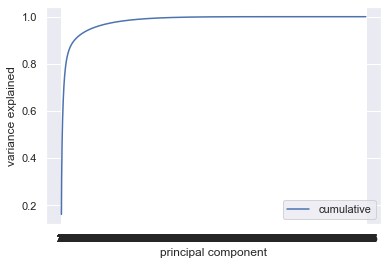

In [19]:
# Create plot
xcor = np.arange(1, len(pveo) + 1) # 1,2,..,n_components
plt.xticks(xcor)

# Add cumulative sum
pveo_cumsum = np.cumsum(pveo)
plt.plot(
    xcor, # 1.5,2.5,..,n_components
    pveo_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.legend()
plt.show()

#### Variance explained by the first 2 components: 39.6%

In [20]:
pveo_cumsum[:2].sum() # 39.6% of the variance is explained by 2 components

0.3962589

#### Number of components to explain: 80% (61), 90% (175), 95% (175) and 99% (1071) of the variance

In [21]:
# 80% of the variance explained
pveo80=pveo_cumsum[pveo_cumsum<=0.80]
cumvar_80=np.count_nonzero(pveo80)

# 90% of the variance explained
pveo90=pveo_cumsum[pveo_cumsum<=0.90]
cumvar_90=np.count_nonzero(pveo90)

# 95% of the variance explained
pveo95=pveo_cumsum[pveo_cumsum<=0.95]
cumvar_95=np.count_nonzero(pveo95)

# 99% of the variance explained
pveo99=pveo_cumsum[pveo_cumsum<=0.99]
cumvar_99=np.count_nonzero(pveo99)

print('Cum. Var.80%:', cumvar_80)
print('Cum. Var.90%:', cumvar_90)
print('Cum. Var.95%:', cumvar_95)
print('Cum. Var.99%:', cumvar_99)

Cum. Var.80%: 61
Cum. Var.90%: 175
Cum. Var.95%: 407
Cum. Var.99%: 1071


### PCA 2d

In [22]:
# Create PCA transformer
pca2 = PCA(n_components=2)

# Apply PCA to rescaled data
Xo_2d_rescaled = pca2.fit_transform(Xo_rescaled)
Xp_2d_rescaled = pca2.fit_transform(Xp_rescaled)

In [23]:
Xo_2d_rescaled.shape

(5000, 2)

#### Sample the Xo_2d_rescaled (Overfeat) to get 500 data points using train/test split function from Scikit Learn

In [24]:
# Split data into train/test sets
Xo_2d_500, Xo_2d_remaining, yo_2d_500, yo_2d_remaining = train_test_split(
    Xo_2d_rescaled, y, train_size=500, test_size=4500, random_state=0)

In [25]:
print(Xo_2d_500.shape)
print(yo_2d_500.shape)

(500, 2)
(500,)


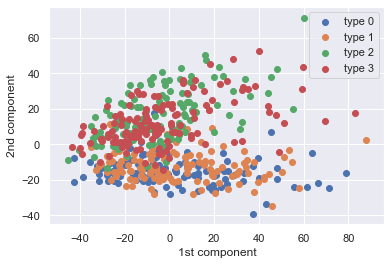

In [26]:
# Plot each kind of 4 image classes
for kind in [0,1,2,3]:
    # Image samples of this type
    idx = (yo_2d_500 == kind)

    # Plot 2 components
    plt.scatter(
        Xo_2d_500[idx, 0], Xo_2d_500[idx, 1],
        label='type {}'.format(kind)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

* It appears that the PCA with 2 components succeeds to differentiate the 4 different types of images. However, the overlap of data points aross categories would indicate that there is a risk of error in the classification.
* It indicates that there ar some outliers for all class types

#### Sample the Xp_2d_rescaled (Pixels) to get 500 data points using train/test split function from Scikit Learn

In [27]:
# Split data into train/test sets
Xp_2d_500, Xp_2d_remaining, yp_2d_500, yp_2d_remaining = train_test_split(
    Xp_2d_rescaled, y, train_size=500, test_size=4500, random_state=0)

In [28]:
print(Xp_2d_500.shape)
print(yp_2d_500.shape)

(500, 2)
(500,)


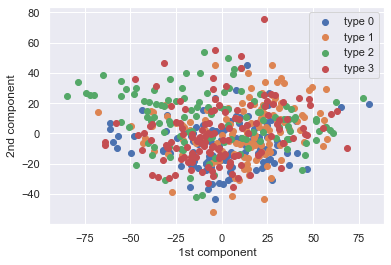

In [29]:
# Plot each kind of 4 image classes
for kind in [0,1,2,3]:
    # Image samples of this type
    idx = (yo_2d_500 == kind)

    # Plot 2 components
    plt.scatter(
        Xp_2d_500[idx, 0], Xp_2d_500[idx, 1],
        label='type {}'.format(kind)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

* PCA 2d on pixels is more blanaced that with overfeat
* Data points are more centered and would indicate less outliers that PCA on obverfeat